In [ ]:
!nvidia-smi
!pip install wandb -qq

!pip install ultralytics==8.0.196 roboflow
!pip install --upgrade ultralytics

!pip install -U albumentations
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

Wed Oct 30 06:45:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:

import os
import numpy as np                                                                              
import pandas as pd                                                                           
import matplotlib.pyplot as plt                                                               
import math                                                                                     
import cv2                                                                                 
import seaborn as sns                                                                       


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                           
from tensorflow.keras.models import Sequential                                                  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization 
from tensorflow.keras.optimizers import Adam,SGD                                           
from tensorflow.keras import backend
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input

from sklearn import preprocessing                                                              
from sklearn.model_selection import train_test_split                                          
from sklearn.metrics import confusion_matrix                                                   
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


# Displaying images using OpenCV
from google.colab.patches import cv2_imshow                                                    
import random

import warnings
warnings.filterwarnings('ignore')
from ultralytics import YOLO

import numpy as np
from roboflow import Roboflow

from IPython.display import display, Image

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path="/content/drive/MyDrive/Road_Side_Detection/Road_Sign_Detection "

data_yaml_path = os.path.join(dataset_path, "data.yaml")
data_yaml_without_hs_path = os.path.join(dataset_path, "data_without_hs.yaml")
data_yaml_without_hs_mosaic_path = os.path.join(dataset_path, "data_without_hs_mosaic.yaml")

test_images_path = os.path.join(dataset_path, "test/images")
test_final_images_path = os.path.join(dataset_path, "test_final")

print(data_yaml_path)

/content/drive/MyDrive/Road_Side_Detection/Road_Sign_Detection /data.yaml


In [ ]:
import zipfile

# Location of train zip file
zip_file_path = '/content/drive/MyDrive/Q3_2/train.zip'

# Extraction path
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_2


In [ ]:
# Location of test zip file
zip_file_path = '/content/drive/MyDrive/Q3_2/test.zip'

# Extraction path
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_2


In [ ]:
# Location of valid zip file
zip_file_path = '/content/drive/MyDrive/Q3_2/valid.zip'

# Extraction path
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/Q3_2


In [ ]:
data_yaml_path = r'/content/drive/MyDrive/Q3_2/data.yaml'
data_yaml_without_hs_path = r'/content/drive/MyDrive/Q3_2/data_without_hsv.yaml'

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov10s.pt')  # Using yolo v10s pretrained model

100%|██████████| 15.9M/15.9M [00:00<00:00, 54.7MB/s]


In [ ]:
results = model.train(data=data_yaml_path, epochs=10, batch=8, imgsz=640, dropout=0.1, classes = [9, 14, 15] ,cache=False) #training the model with data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/drive/MyDrive/Q3_2/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[9, 14, 15], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 43.7MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 191MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Q3_2/train/labels... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [01:13<00:00, 73.29it/s] 


train: New cache created: /content/drive/MyDrive/Q3_2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Q3_2/valid/labels... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:04<00:00, 129.24it/s]


val: New cache created: /content/drive/MyDrive/Q3_2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.97G      1.595      70.28      2.514          0        640: 100%|██████████| 676/676 [01:31<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.63it/s]

                   all        641        124      0.807      0.398      0.413        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.95G      1.502      5.081      2.365          0        640: 100%|██████████| 676/676 [01:24<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.14it/s]

                   all        641        124      0.736      0.502       0.58      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.95G      1.515      3.158      2.327          1        640: 100%|██████████| 676/676 [01:22<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.53it/s]

                   all        641        124      0.756      0.541       0.58      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.89G      1.409      2.548      2.294          4        640: 100%|██████████| 676/676 [01:22<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.39it/s]

                   all        641        124      0.884      0.523      0.711      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.95G      1.384      2.137      2.263          1        640: 100%|██████████| 676/676 [01:22<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.24it/s]

                   all        641        124       0.61      0.677      0.691      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.95G      1.315      1.884      2.204          2        640: 100%|██████████| 676/676 [01:23<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.83it/s]

                   all        641        124      0.776      0.598      0.745       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G      1.177      1.466      2.064          1        640: 100%|██████████| 676/676 [01:21<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.02it/s]

                   all        641        124      0.666      0.677      0.754      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.95G      1.089      1.288      1.979          0        640: 100%|██████████| 676/676 [01:21<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.41it/s]

                   all        641        124      0.593      0.798      0.787      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.95G      1.076      1.079      2.016          0        640: 100%|██████████| 676/676 [01:22<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.48it/s]

                   all        641        124      0.689      0.782      0.781      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.89G      1.023     0.9813       1.97          0        640: 100%|██████████| 676/676 [01:22<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.01it/s]

                   all        641        124      0.721      0.802      0.801      0.678



10 epochs completed in 0.254 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 19.46it/s]


                   all        641        124      0.721      0.801      0.801      0.677
          One way road         27         27      0.886      0.815      0.842      0.734
    Speed limit 20 Kph         40         42      0.643      0.833       0.84      0.697
    Speed limit 30 Kph         48         55      0.634      0.755       0.72      0.601
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
#finetuning the model to handle specific classes of blur images

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Train the model
results = model.train(data=data_yaml_path, epochs=10, batch=8, imgsz=640, dropout=0.1, classes = [0, 9, 14, 15], cache=False) #training the model with data.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/drive/MyDrive/Q3_2/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0, 9, 14, 15], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

train: Scanning /content/drive/MyDrive/Q3_2/train/labels.cache... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.06G       1.12      1.637      2.169          0        640: 100%|██████████| 676/676 [01:34<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.31it/s]

                   all        641        139      0.746      0.697      0.782      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.96G      1.197       1.39      2.275          0        640: 100%|██████████| 676/676 [01:27<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.22it/s]

                   all        641        139      0.691      0.716      0.759        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.96G      1.198      1.478      2.199          1        640: 100%|██████████| 676/676 [01:24<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.10it/s]

                   all        641        139      0.879      0.609      0.766      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.9G      1.229      1.356      2.276          4        640: 100%|██████████| 676/676 [01:24<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.54it/s]

                   all        641        139      0.709      0.809      0.791      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.96G      1.173      1.345      2.202          2        640: 100%|██████████| 676/676 [01:24<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.94it/s]

                   all        641        139      0.771      0.723      0.775      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.95G       1.14      1.108       2.18          2        640: 100%|██████████| 676/676 [01:24<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.07it/s]

                   all        641        139      0.714      0.832      0.806       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G      1.066     0.9043      2.079          1        640: 100%|██████████| 676/676 [01:24<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.07it/s]

                   all        641        139      0.753       0.82      0.839      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.95G      1.023     0.8931      2.053          2        640: 100%|██████████| 676/676 [01:24<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.61it/s]

                   all        641        139      0.772      0.796      0.844      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.95G      1.005     0.7725      2.051          0        640: 100%|██████████| 676/676 [01:24<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.48it/s]

                   all        641        139      0.816      0.836      0.851      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.9G     0.9815     0.7041      2.058          1        640: 100%|██████████| 676/676 [01:24<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 17.32it/s]

                   all        641        139       0.84      0.815       0.85      0.731



10 epochs completed in 0.273 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 19.73it/s]


                   all        641        139       0.84      0.815      0.851      0.732
-Road narrows on right         15         15      0.926        0.8      0.904      0.778
          One way road         27         27          1      0.802       0.84      0.743
    Speed limit 20 Kph         40         42      0.761      0.857      0.897      0.764
    Speed limit 30 Kph         48         55      0.673        0.8      0.765      0.644
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
#further finetuning with different parameters for specific classes

In [ ]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Train the model
results = model.train(data=data_yaml_without_hs_path, epochs=20, batch=8, imgsz=640, dropout=0.1, classes = [0, 8, 9, 14, 15], cache=False) #train the model with data without hs.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train2/weights/best.pt, data=/content/drive/MyDrive/Q3_2/data_without_hsv.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0, 8, 9, 14, 15], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

train: Scanning /content/drive/MyDrive/Q3_2/train/labels.cache... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.08G      2.228       4.03      2.944          3        640: 100%|██████████| 676/676 [01:35<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.72it/s]

                   all        641        162      0.806      0.628      0.751      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.96G      1.715      2.487      2.597          8        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.23it/s]

                   all        641        162      0.648      0.632       0.73      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.95G      1.747      2.307      2.589          6        640: 100%|██████████| 676/676 [01:27<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.63it/s]

                   all        641        162      0.831      0.735      0.823      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.95G      1.686      2.177       2.54          4        640: 100%|██████████| 676/676 [01:26<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.01it/s]

                   all        641        162      0.837      0.694      0.777       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.95G      1.605      1.955      2.498          5        640: 100%|██████████| 676/676 [01:26<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.01it/s]


                   all        641        162      0.885      0.767      0.841      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.95G       1.59      1.867      2.489          3        640: 100%|██████████| 676/676 [01:26<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.37it/s]

                   all        641        162      0.821      0.811      0.862      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.95G      1.562      1.749      2.462          2        640: 100%|██████████| 676/676 [01:27<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.05it/s]

                   all        641        162      0.876      0.802       0.87      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.95G      1.512      1.659       2.42          2        640: 100%|██████████| 676/676 [01:26<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.96it/s]

                   all        641        162      0.878      0.833      0.872      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.95G      1.508      1.577      2.438          1        640: 100%|██████████| 676/676 [01:26<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.20it/s]

                   all        641        162      0.849      0.808      0.874       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.95G      1.458      1.518       2.36          2        640: 100%|██████████| 676/676 [01:27<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.68it/s]

                   all        641        162      0.913      0.757       0.89      0.722


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.95G      1.108      0.819      2.195          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.90it/s]

                   all        641        162      0.882      0.835      0.882      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.95G      1.078     0.7378      2.133          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.24it/s]

                   all        641        162      0.868      0.865       0.89      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.95G       1.04     0.7645      2.131          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.50it/s]

                   all        641        162      0.891       0.82      0.893       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.95G      1.007     0.6347      2.096          1        640: 100%|██████████| 676/676 [01:25<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.30it/s]

                   all        641        162      0.908      0.849      0.897      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.95G     0.9954     0.5861        2.1          0        640: 100%|██████████| 676/676 [01:25<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.50it/s]

                   all        641        162       0.88      0.868      0.899      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.95G     0.9643     0.5525      2.072          0        640: 100%|██████████| 676/676 [01:25<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.27it/s]

                   all        641        162      0.882      0.873        0.9      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.95G     0.9308     0.5243      2.027          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.01it/s]

                   all        641        162      0.919      0.841       0.91      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.89G     0.8966     0.4639      2.019          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.66it/s]

                   all        641        162      0.921      0.893       0.92      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.95G     0.8764     0.4657      1.994          2        640: 100%|██████████| 676/676 [01:25<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 15.69it/s]

                   all        641        162      0.923      0.881      0.924      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.95G     0.8397     0.4484      1.943          1        640: 100%|██████████| 676/676 [01:25<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 16.05it/s]

                   all        641        162      0.929      0.884      0.918      0.769



20 epochs completed in 0.544 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 16.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:02<00:00, 18.70it/s]


                   all        641        162      0.923      0.881      0.924      0.777
-Road narrows on right         15         15          1       0.93      0.949      0.836
        No_Over_Taking         23         23          1      0.983      0.995      0.782
          One way road         27         27          1      0.812       0.87      0.766
    Speed limit 20 Kph         40         42      0.893      0.791      0.929      0.769
    Speed limit 30 Kph         48         55      0.721      0.891      0.877      0.732
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
#finetuning on the entire train dataset

In [ ]:
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Train the model
results = model.train(data=data_yaml_without_hs_path, epochs=10, batch=8, imgsz=640, dropout=0.1, cache=False)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/best.pt, data=/content/drive/MyDrive/Q3_2/data_without_hsv.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning /content/drive/MyDrive/Q3_2/train/labels.cache... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.18G      1.408      4.617      2.207          5        640: 100%|██████████| 676/676 [01:37<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.66it/s]

                   all        641        819      0.978      0.168      0.221       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.16G      1.339      4.045      2.184          7        640: 100%|██████████| 676/676 [01:30<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.11it/s]

                   all        641        819      0.929      0.208      0.278      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.17G      1.339      3.482      2.258          9        640: 100%|██████████| 676/676 [01:28<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.89it/s]

                   all        641        819      0.899      0.255      0.318      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.15G      1.312      3.115      2.287          9        640: 100%|██████████| 676/676 [01:27<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.02it/s]

                   all        641        819      0.917      0.307       0.39      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.15G      1.267      2.819      2.301          6        640: 100%|██████████| 676/676 [01:27<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.74it/s]

                   all        641        819      0.845      0.386      0.445      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.15G      1.236      2.548      2.304         10        640: 100%|██████████| 676/676 [01:27<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:04<00:00, 10.11it/s]

                   all        641        819      0.898      0.407      0.486      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.15G      1.199      2.409      2.279          5        640: 100%|██████████| 676/676 [01:27<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.94it/s]

                   all        641        819      0.863      0.424      0.509      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.15G      1.169      2.307      2.272          6        640: 100%|██████████| 676/676 [01:27<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.89it/s]

                   all        641        819       0.87      0.451      0.528      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.15G      1.144      2.213       2.26          6        640: 100%|██████████| 676/676 [01:27<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.56it/s]

                   all        641        819      0.827      0.481      0.543      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.15G      1.111      2.156      2.246          7        640: 100%|██████████| 676/676 [01:27<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.70it/s]

                   all        641        819      0.706      0.533      0.555      0.442



10 epochs completed in 0.291 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 16.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.35it/s]


                   all        641        819      0.704      0.533      0.553       0.44
-Road narrows on right         15         15      0.938      0.933      0.991      0.858
     Attention Please-         23         23          1          0       0.16      0.141
    Beware of children         23         23      0.529      0.217       0.33      0.266
CYCLE ROUTE AHEAD WARNING         29         29          1          0      0.124      0.112
             Crosswalk         42         43      0.795      0.767      0.749      0.533
Dangerous Left Curve Ahead         24         24      0.748     0.0833      0.168      0.134
Dangerous Rright Curve Ahead         30         30          1          0       0.11     0.0971
              No Entry         44         45          1          0     0.0662     0.0603
        No_Over_Taking         23         23      0.866      0.957       0.97      0.707
          One way road         27         27      0.679      0.889      0.896      0.772
      Sp

In [ ]:
#further finetuning on entire dataset using differnet parameters

In [ ]:
model = YOLO("/content/runs/detect/train4/weights/best.pt")

# Train the model
results = model.train(data=data_yaml_without_hs_path, epochs=40, batch=8, imgsz=640, dropout=0.1, cache=False) #training the model with data without hs.yaml

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train4/weights/best.pt, data=/content/drive/MyDrive/Q3_2/data_without_hsv.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning /content/drive/MyDrive/Q3_2/train/labels.cache... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.28G      1.536       3.06      2.432         17        640: 100%|██████████| 676/676 [01:39<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.40it/s]

                   all        641        819       0.87      0.458      0.539      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.17G      1.496      2.858      2.415         22        640: 100%|██████████| 676/676 [01:31<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.66it/s]

                   all        641        819      0.668      0.524      0.559      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.15G      1.495      2.691      2.412         15        640: 100%|██████████| 676/676 [01:29<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.91it/s]

                   all        641        819      0.712      0.556      0.585       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.16G      1.512      2.506      2.423         15        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.26it/s]

                   all        641        819       0.54        0.7      0.604      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.15G      1.479      2.329      2.415         14        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.59it/s]

                   all        641        819      0.583      0.761      0.661      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.15G      1.471      2.167      2.398          9        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.66it/s]

                   all        641        819      0.672        0.7      0.702      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.15G      1.452      2.017      2.377         11        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.37it/s]

                   all        641        819      0.673      0.784       0.75      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.14G      1.436       1.93      2.376          7        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.84it/s]

                   all        641        819      0.725      0.734      0.783      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.15G      1.428      1.825      2.373         10        640: 100%|██████████| 676/676 [01:28<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.26it/s]

                   all        641        819      0.713      0.838      0.844      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.16G      1.406      1.734      2.348         10        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.83it/s]

                   all        641        819      0.782      0.805      0.841      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.15G      1.419      1.667      2.358         12        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.94it/s]

                   all        641        819        0.8      0.805      0.841      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.15G      1.375      1.554      2.332         13        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.50it/s]

                   all        641        819      0.838      0.849      0.863      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.15G      1.382      1.534       2.33         11        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.92it/s]

                   all        641        819      0.827      0.825      0.848      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.15G      1.358      1.455      2.311         14        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.70it/s]

                   all        641        819      0.849      0.817      0.865      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.15G      1.343      1.429      2.308         15        640: 100%|██████████| 676/676 [01:29<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.41it/s]

                   all        641        819      0.851      0.839       0.89      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.15G       1.33      1.383        2.3         12        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.07it/s]

                   all        641        819      0.851      0.863      0.901      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.15G      1.335       1.34      2.291         13        640: 100%|██████████| 676/676 [01:28<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.26it/s]


                   all        641        819      0.892       0.83      0.901      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.15G      1.309      1.283      2.283         12        640: 100%|██████████| 676/676 [01:29<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.14it/s]

                   all        641        819      0.891      0.857      0.904      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.15G      1.296      1.247      2.271         15        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.41it/s]

                   all        641        819      0.918      0.827       0.91      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.14G      1.296      1.241      2.264         11        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.51it/s]

                   all        641        819      0.901      0.851      0.908      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.15G      1.276      1.181      2.258         13        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.65it/s]

                   all        641        819      0.879      0.876      0.912      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.15G      1.268      1.155      2.247         10        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.62it/s]

                   all        641        819       0.89      0.878      0.911      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.15G      1.257       1.14      2.247         11        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.35it/s]

                   all        641        819      0.908      0.879      0.923      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.14G      1.246      1.139      2.247         19        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.07it/s]

                   all        641        819       0.91      0.848      0.922      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.15G      1.233      1.085      2.215         15        640: 100%|██████████| 676/676 [01:29<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.26it/s]

                   all        641        819      0.899      0.878      0.924      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.16G      1.218      1.078      2.209         11        640: 100%|██████████| 676/676 [01:29<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.33it/s]

                   all        641        819        0.9      0.873      0.923       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.15G      1.196      1.049      2.206         12        640: 100%|██████████| 676/676 [01:29<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.63it/s]

                   all        641        819      0.935      0.861      0.926      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.15G      1.189      1.043      2.193         10        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.17it/s]

                   all        641        819      0.904      0.874      0.922      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.15G      1.182      1.018      2.199         11        640: 100%|██████████| 676/676 [01:29<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.84it/s]

                   all        641        819      0.897      0.896      0.927       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.15G      1.174      1.027      2.196         14        640: 100%|██████████| 676/676 [01:28<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.88it/s]

                   all        641        819      0.925      0.884      0.924      0.774


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.15G     0.9758     0.5699      2.119          5        640: 100%|██████████| 676/676 [01:29<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.52it/s]

                   all        641        819      0.911      0.869      0.917      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.14G     0.9546     0.5516      2.103          6        640: 100%|██████████| 676/676 [01:29<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.68it/s]

                   all        641        819       0.92      0.881      0.925      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.15G     0.9322     0.5296      2.096          8        640: 100%|██████████| 676/676 [01:28<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.44it/s]

                   all        641        819      0.932      0.864      0.923       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.14G     0.9229     0.5185      2.073          6        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.46it/s]

                   all        641        819      0.904      0.884      0.925      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.15G     0.9048     0.5028      2.066          8        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.53it/s]

                   all        641        819       0.91       0.89      0.929      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.14G     0.8876     0.4812      2.055          5        640: 100%|██████████| 676/676 [01:28<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.82it/s]

                   all        641        819      0.919      0.885      0.929      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.15G     0.8747     0.4745      2.044          5        640: 100%|██████████| 676/676 [01:29<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.82it/s]

                   all        641        819      0.904      0.889       0.93      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.14G     0.8674     0.4596      2.032          5        640: 100%|██████████| 676/676 [01:28<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.41it/s]

                   all        641        819      0.911      0.899      0.932      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.15G     0.8569     0.4505      2.025          6        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.08it/s]

                   all        641        819      0.912      0.892      0.933      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.14G     0.8444      0.447      2.014          5        640: 100%|██████████| 676/676 [01:29<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.77it/s]

                   all        641        819       0.92      0.879      0.932      0.784



40 epochs completed in 1.072 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 16.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.89it/s]


                   all        641        819      0.912      0.888      0.932      0.784
-Road narrows on right         15         15       0.93      0.867      0.946      0.861
     Attention Please-         23         23       0.96          1      0.995      0.893
    Beware of children         23         23      0.934      0.913      0.954      0.869
CYCLE ROUTE AHEAD WARNING         29         29          1      0.957       0.97       0.87
             Crosswalk         42         43      0.891      0.884      0.953      0.729
Dangerous Left Curve Ahead         24         24      0.705      0.798      0.807      0.677
Dangerous Rright Curve Ahead         30         30      0.876      0.705      0.916      0.782
              No Entry         44         45      0.963        0.6      0.659      0.607
        No_Over_Taking         23         23      0.995          1      0.995      0.773
          One way road         27         27      0.878      0.852      0.875      0.768
      Sp

In [ ]:
data_yaml_without_hs_mosaic_path = r'/content/drive/MyDrive/Q3_2/data_without_hs_mosaic.yaml'

In [ ]:
#finetuning without mosaic augmentation

In [ ]:
model = YOLO("/content/runs/detect/train5/weights/best.pt")

# Train the model
results = model.train(data=data_yaml_without_hs_mosaic_path, epochs=10, batch=8, imgsz=640, dropout=0.1, cache=False)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train5/weights/best.pt, data=/content/drive/MyDrive/Q3_2/data_without_hs_mosaic.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

train: Scanning /content/drive/MyDrive/Q3_2/train/labels.cache... 5405 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5405/5405 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.35G      0.893     0.4934      2.047          5        640: 100%|██████████| 676/676 [03:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.92it/s]

                   all        641        819      0.922      0.855      0.926      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.18G     0.9678     0.5927      2.114          7        640: 100%|██████████| 676/676 [01:31<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.76it/s]

                   all        641        819      0.917      0.847      0.921       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.18G      1.007     0.6294      2.133          9        640: 100%|██████████| 676/676 [01:29<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.52it/s]

                   all        641        819       0.88      0.862      0.905      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.18G       1.01       0.63      2.144          9        640: 100%|██████████| 676/676 [01:28<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.96it/s]

                   all        641        819      0.916      0.838      0.925      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.18G     0.9722     0.5776      2.123          6        640: 100%|██████████| 676/676 [01:28<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.68it/s]

                   all        641        819      0.897      0.893      0.922      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.18G      0.956     0.5411        2.1         10        640: 100%|██████████| 676/676 [01:29<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.67it/s]

                   all        641        819      0.906      0.887      0.934       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.18G     0.9214     0.4965      2.069          5        640: 100%|██████████| 676/676 [01:28<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.57it/s]

                   all        641        819      0.924      0.892      0.932      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.18G     0.8945     0.4815       2.05          6        640: 100%|██████████| 676/676 [01:28<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.65it/s]

                   all        641        819      0.899        0.9      0.933      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.18G     0.8618     0.4462      2.027          6        640: 100%|██████████| 676/676 [01:28<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.51it/s]

                   all        641        819      0.919      0.886      0.934      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.18G     0.8308      0.431      2.012          7        640: 100%|██████████| 676/676 [01:28<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 11.61it/s]

                   all        641        819      0.925      0.911      0.936      0.789



10 epochs completed in 0.306 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 16.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 16.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10s summary (fused): 293 layers, 8,054,310 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:03<00:00, 10.50it/s]


                   all        641        819      0.925      0.912      0.936      0.788
-Road narrows on right         15         15      0.963      0.933      0.951      0.865
     Attention Please-         23         23      0.979      0.957       0.99      0.885
    Beware of children         23         23      0.888      0.913      0.957      0.871
CYCLE ROUTE AHEAD WARNING         29         29          1      0.954      0.971      0.876
             Crosswalk         42         43      0.891       0.95      0.968      0.729
Dangerous Left Curve Ahead         24         24      0.679      0.794      0.827      0.693
Dangerous Rright Curve Ahead         30         30      0.958        0.8       0.93      0.758
              No Entry         44         45          1      0.568      0.675      0.613
        No_Over_Taking         23         23          1      0.976      0.995      0.806
          One way road         27         27      0.955      0.852       0.87      0.746
      Sp

In [ ]:
results = model.val()  # Run validation and return results

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68,147,643 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /content/drive/MyDrive/Q3_2/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.19it/s]


                   all        641        819      0.919      0.868      0.922      0.769
-Road narrows on right         15         15          1      0.838      0.937       0.86
     Attention Please-         23         23       0.98          1      0.995      0.887
    Beware of children         23         23      0.982       0.87      0.948      0.856
CYCLE ROUTE AHEAD WARNING         29         29          1      0.951      0.995      0.863
             Crosswalk         42         43      0.868      0.953      0.922      0.705
Dangerous Left Curve Ahead         24         24      0.627      0.708      0.753      0.644
Dangerous Rright Curve Ahead         30         30      0.951      0.645      0.911      0.781
              No Entry         44         45       0.94        0.6      0.613      0.557
        No_Over_Taking         23         23      0.994      0.957       0.99      0.728
          One way road         27         27      0.963      0.815      0.874      0.768
      Sp

In [ ]:
# Make predictions on the test set
predictions = model.predict(source=r'/content/drive/MyDrive/Q3_2/test', save=True)


image 1/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Beware of children, 1 No_Over_Taking, 11.4ms
image 2/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 Speed limit 20 Kph, 11.3ms
image 3/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 15.9ms
image 4/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 15.1ms
image 5/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 1 Uneven Road, 12.3ms
image 6/308 /content/drive/MyDrive/Q3_2/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 11.3ms
image 7/308 /content/drive/MyDrive/Q3_2/

In [ ]:
#predicting images using the trained model


image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00028_00028_png_jpg.rf.7f818e327eae8aa48427a39dc178b1bd.jpg: 640x640 1 Speed limit 30 Kph, 14.6ms
Speed: 2.3ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


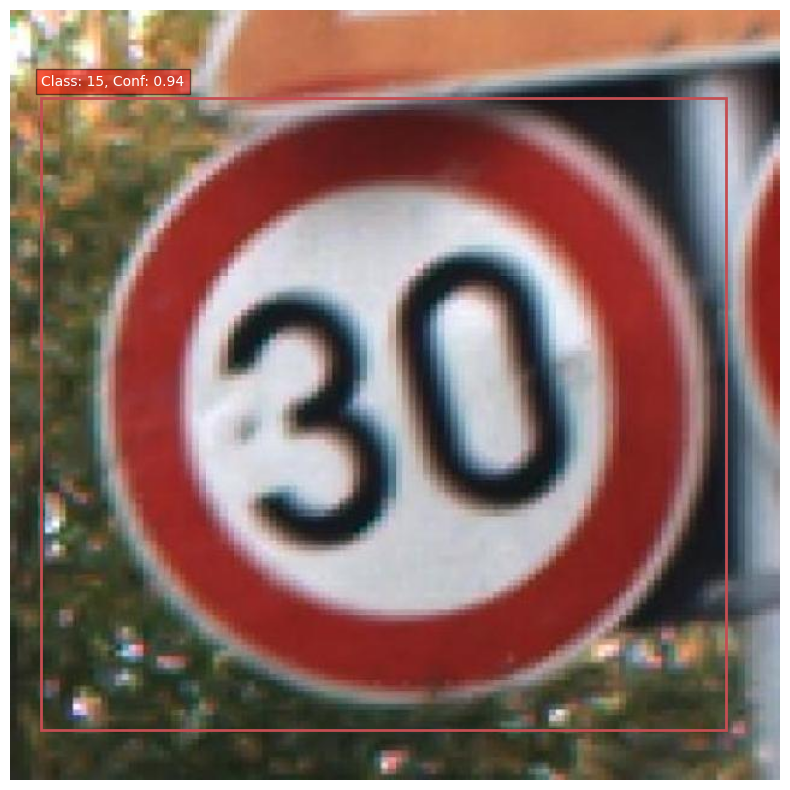


image 1/1 /content/drive/MyDrive/Q3_2/test/00000_00002_00029_png_jpg.rf.c4f12857b8783cdb7cc5c6346675c0a0.jpg: 640x640 1 Speed limit 20 Kph, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


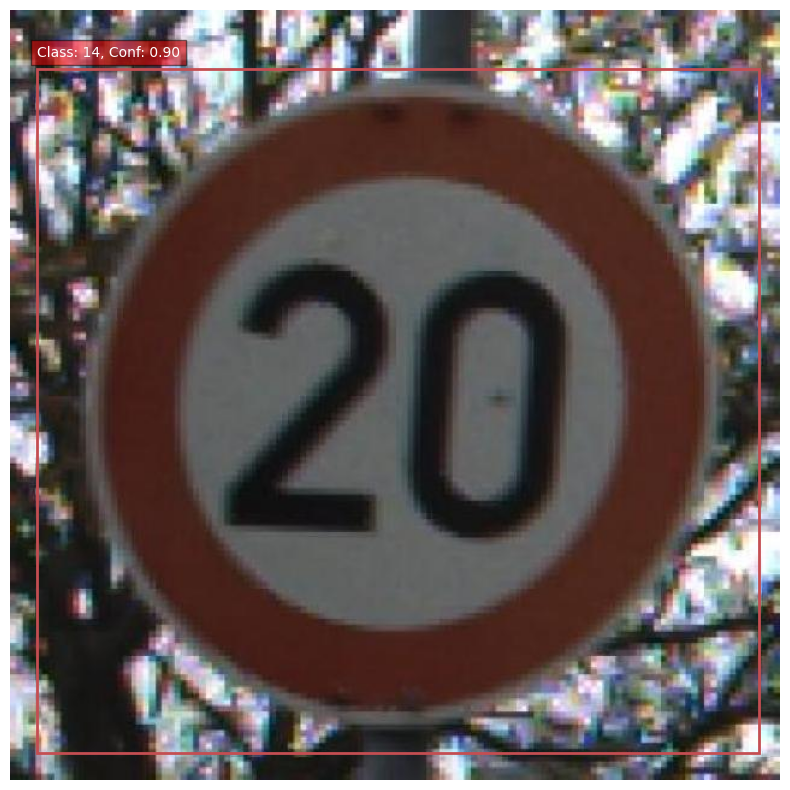


image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00034_00020_png_jpg.rf.c6f3e91cd99d667e9cc923559f837e50.jpg: 640x640 1 Speed limit 30 Kph, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


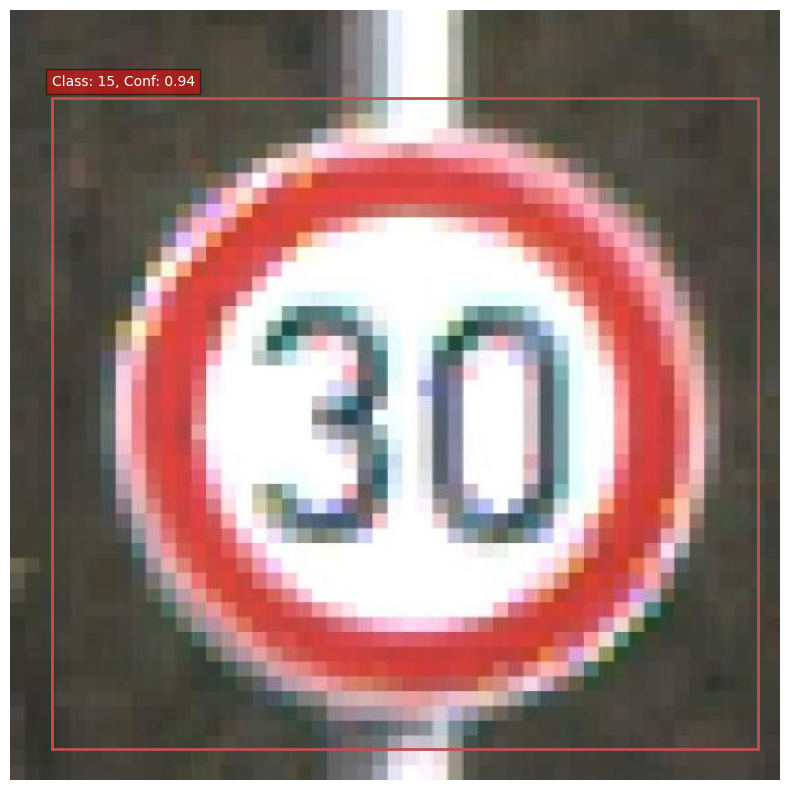


image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00017_00029_png_jpg.rf.3a77b5a7d17c2db087bdfe2325650a8a.jpg: 640x640 1 Speed limit 30 Kph, 23.8ms
Speed: 1.8ms preprocess, 23.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


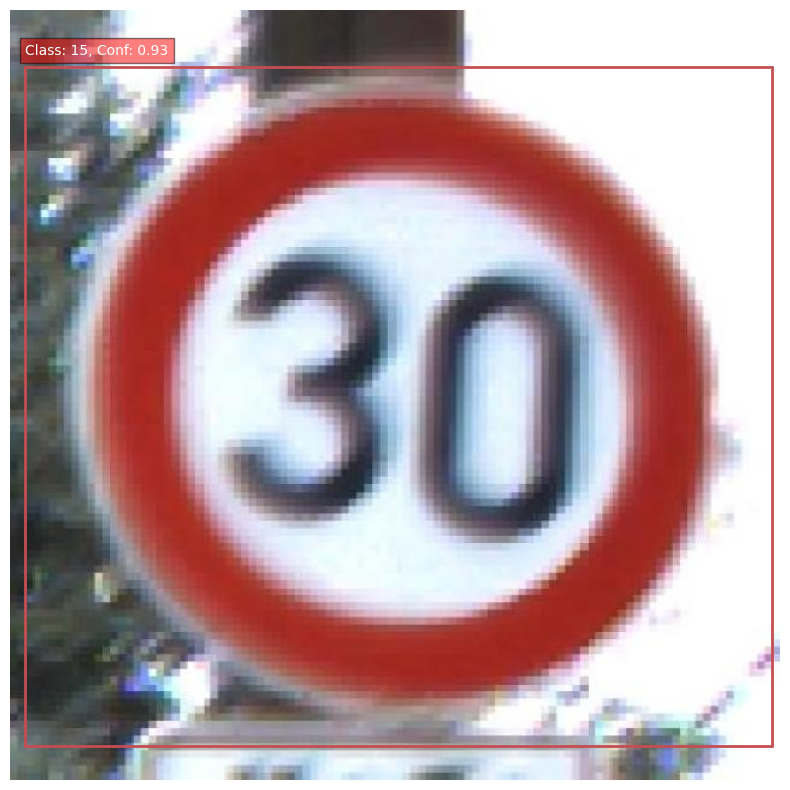


image 1/1 /content/drive/MyDrive/Q3_2/test/road267_png.rf.e816cfdb18e7f74212774c62e394ab10.jpg: 640x640 1 Speed bump ahead, 1 Speed limit 40 Kph, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


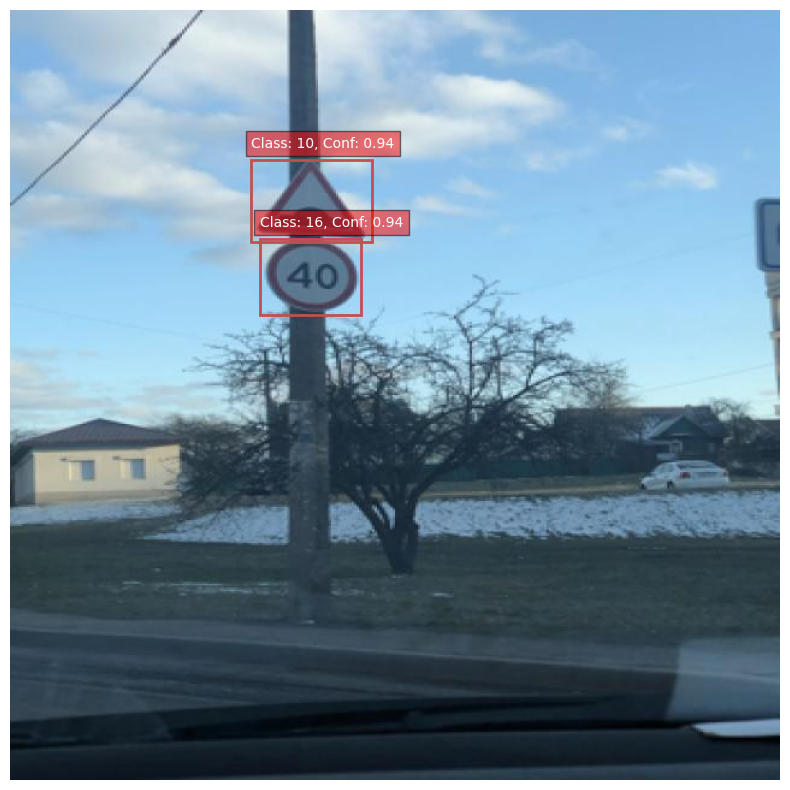

Predicted images saved to: /content/drive/MyDrive/Q3_2/predicted_images


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

output_dir = r'/content/drive/MyDrive/Q3_2/predicted_images'
os.makedirs(output_dir, exist_ok=True)  

# Function to visualize, save, and print image with predicted bounding boxes
def visualize_and_save_predictions(image_path, predictions, save_path):
    # Open the image
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    # Iterating through the predictions and drawing the boxes
    for box in predictions.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist() 
        conf = box.conf[0].item()
        cls = int(box.cls[0].item()) 

        # Rectangle patch for the bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Annotating the bounding box with class and confidence
        plt.text(x1, y1 - 10, f'Class: {cls}, Conf: {conf:.2f}', color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.close()  

# Directory where test images are stored
test_image_dir = r'/content/drive/MyDrive/Q3_2/test'

# Getting a list of all test image filenames
test_image_files = [f for f in os.listdir(test_image_dir) if f.endswith('.jpg')]

# Random test images to visualize, save, and print
num_images_to_visualize = 5
random_image_files = random.sample(test_image_files, num_images_to_visualize)

# Looping through the selected random images, predicting, saving, and printing the visualized images
for image_file in random_image_files:
    image_path = os.path.join(test_image_dir, image_file)
    prediction = model.predict(source=image_path) 
    save_path = os.path.join(output_dir, f"predicted_{image_file}")
    visualize_and_save_predictions(image_path, prediction[0], save_path) 

print(f"Predicted images saved to: {output_dir}")

In [ ]:
#bounding box coordinates

In [ ]:
import csv
# Path to save the CSV file
output_csv_path = "/content/drive/MyDrive/Q3_2/bounding_boxes.csv"

with open(output_csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['image_id', 'x1', 'y1', 'x2', 'y2', 'class', 'confidence'])

    # Looping over each test image
    for image_file in test_image_files:
        image_path = os.path.join(test_image_dir, image_file)
        predictions = model.predict(source=image_path)

        # Extracting bounding box information for each prediction
        for box in predictions[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
            conf = box.conf[0].item() 
            cls = int(box.cls[0].item()) 

            writer.writerow([image_file, x1, y1, x2, y2, cls, conf])

print(f"CSV file with bounding box coordinates saved to: {output_csv_path}")


image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00032_00000_png_jpg.rf.2259a87e6d9092f6718e56ff7d2329e2.jpg: 640x640 (no detections), 13.8ms
Speed: 2.4ms preprocess, 13.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/road712_png.rf.acedb4d7b9d0091236a1cf61181ae2b8.jpg: 640x640 1 Speed limit 100 Kph, 1 Speed limit 120 Kph, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00025_00011_png_jpg.rf.b875f944adeb3305fc047a29e2bfcf92.jpg: 640x640 1 Speed limit 30 Kph, 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/road779_png.rf.a2844475bbd44dcbb08d27b85632d41c.jpg: 640x640 1 Speed limit 60 Kph, 1 Uneven Road, 11.2ms
Speed: 1.3ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /co

In [ ]:
#generating submission file by predicting classes for each image of test dataset

In [ ]:
import csv
import os

test_image_dir = r'/content/drive/MyDrive/Q3_2/test'

# CSV file for saving predictions
output_csv = r'/content/drive/MyDrive/Q3_2/submission_m10.csv'

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'class'])

    # Looping through all the test images
    for image_name in os.listdir(test_image_dir):
        image_path = os.path.join(test_image_dir, image_name)

        # Predicting bounding boxes for the test image
        predictions = model.predict(source=image_path)
        class_names = set()

        # Extracting the predicted classes for the image
        for box in predictions[0].boxes:
            cls = int(box.cls[0].item())
            class_name = model.names[cls] 
            class_names.add(class_name) 

        class_names_list = ', '.join(class_names)

        # Writing the image_id and the list of class names to the CSV
        writer.writerow([image_name, class_names_list])

print(f"Predictions saved to {output_csv}")



image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00032_00000_png_jpg.rf.2259a87e6d9092f6718e56ff7d2329e2.jpg: 640x640 (no detections), 14.5ms
Speed: 2.3ms preprocess, 14.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/road712_png.rf.acedb4d7b9d0091236a1cf61181ae2b8.jpg: 640x640 1 Speed limit 100 Kph, 1 Speed limit 120 Kph, 11.7ms
Speed: 1.6ms preprocess, 11.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/00001_00025_00011_png_jpg.rf.b875f944adeb3305fc047a29e2bfcf92.jpg: 640x640 1 Speed limit 30 Kph, 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/test/road779_png.rf.a2844475bbd44dcbb08d27b85632d41c.jpg: 640x640 1 Speed limit 60 Kph, 1 Uneven Road, 14.9ms
Speed: 1.5ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /co

In [ ]:
#IOU calculation

In [ ]:
import os
from ultralytics import YOLO

# Paths to validation images and labels
val_image_dir = r'/content/drive/MyDrive/Q3_2/valid/images'
val_label_dir = r'/content/drive/MyDrive/Q3_2/valid/labels'

# Converting YOLO format to standard box format
def yolo_to_xyxy(box, img_width, img_height):
    x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

# IoU calculation function
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Calculating IoU for each validation image
total_iou = 0
num_boxes = 0

for image_name in os.listdir(val_image_dir):
    image_path = os.path.join(val_image_dir, image_name)
    label_path = os.path.join(val_label_dir, os.path.splitext(image_name)[0] + '.txt')
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Loading ground truth boxes from label file
    ground_truth_boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            ground_truth_boxes.append(yolo_to_xyxy([x_center, y_center, width, height], img_width, img_height))

    # Predicting boxes using YOLO
    yolo_predictions = model.predict(source=image_path)[0]

    # Calculating IoU for each prediction
    for pred_box in yolo_predictions.boxes:
        pred_coords = pred_box.xyxy[0].tolist()
        pred_box_coords = [int(pred_coords[0]), int(pred_coords[1]), int(pred_coords[2]), int(pred_coords[3])]

        # Calculating IoU with each ground truth box
        for gt_box in ground_truth_boxes:
            iou = calculate_iou(pred_box_coords, gt_box)
            total_iou += iou
            num_boxes += 1

# Calculating and printing average IoU
average_iou = total_iou / num_boxes if num_boxes > 0 else 0
print(f"Average IoU over validation set: {average_iou:.4f}")



image 1/1 /content/drive/MyDrive/Q3_2/valid/images/00000_00000_00018_png_jpg.rf.f707cbdaf4d44b31e41ee7d604b558de.jpg: 640x640 1 Speed limit 20 Kph, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/valid/images/00000_00000_00019_png_jpg.rf.0caa91836417583be08013d5f095bcdc.jpg: 640x640 1 Speed limit 20 Kph, 13.9ms
Speed: 2.1ms preprocess, 13.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/valid/images/00000_00000_00021_png_jpg.rf.76273d6def41e680b11585baf2c5060f.jpg: 640x640 1 Speed limit 20 Kph, 1 Uneven Road, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Q3_2/valid/images/00000_00000_00022_png_jpg.rf.6747813c922976c163aa5f9881eed31b.jpg: 640x640 1 Speed limit 20 Kph, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 1.3ms postprocess per image

In [ ]:
print(f"Average IoU over validation set: {average_iou:.4f}")

Average IoU over validation set: 0.8311


In [ ]:
#saving final model weights

In [ ]:
model.save(r"/content/drive/MyDrive/Q3_2/yolov10_model2_weights.pt")

Visualizing some plots created and stored in results during the model development

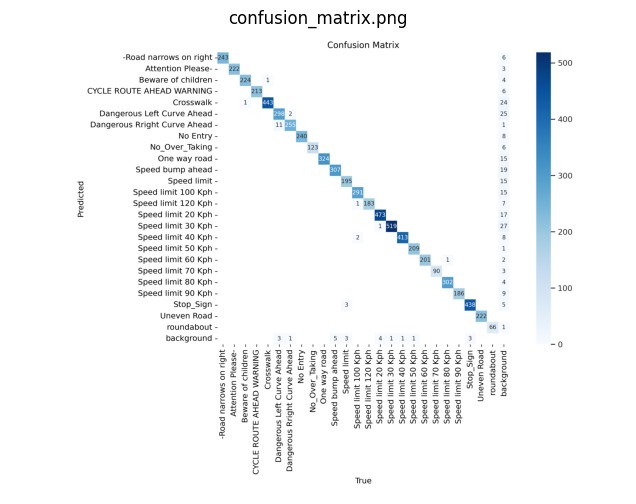

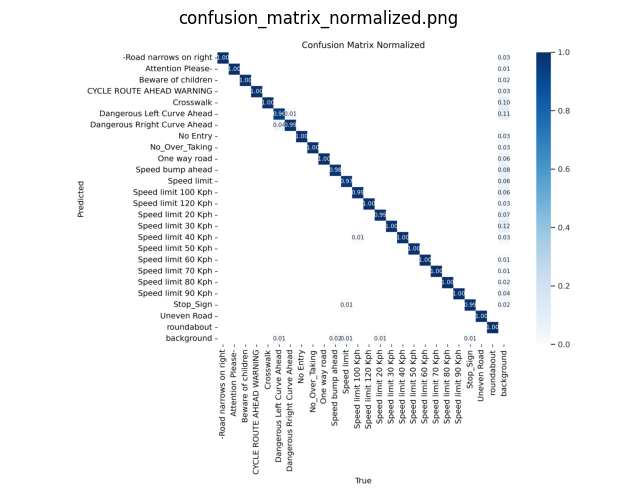

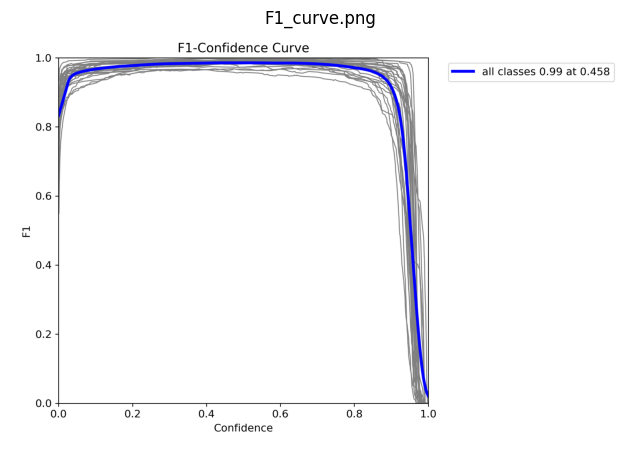

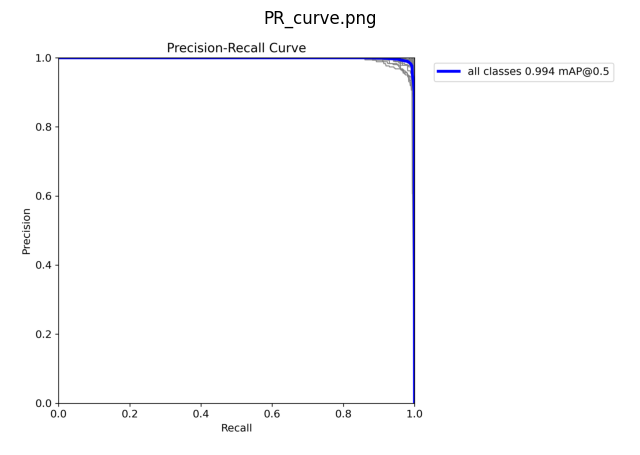

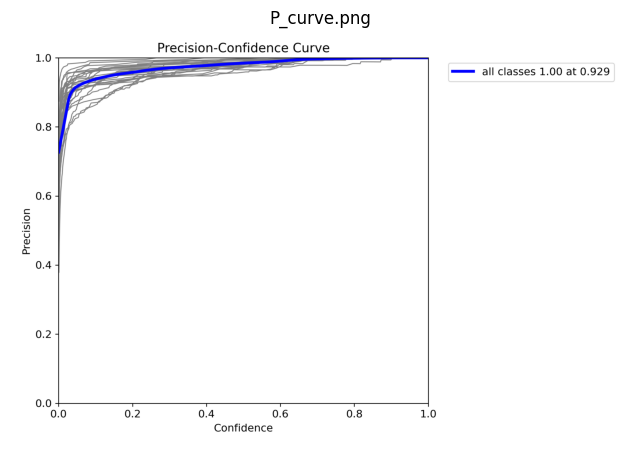

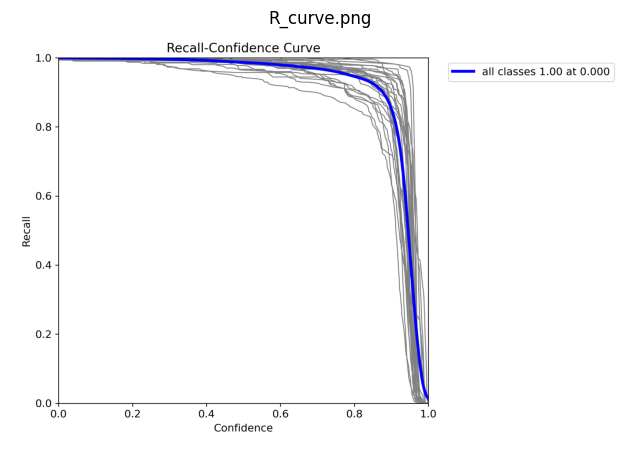

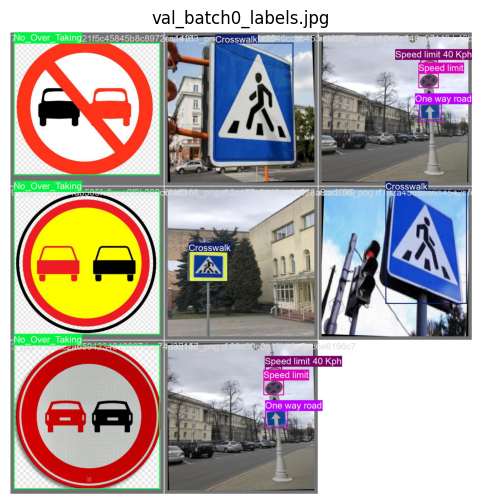

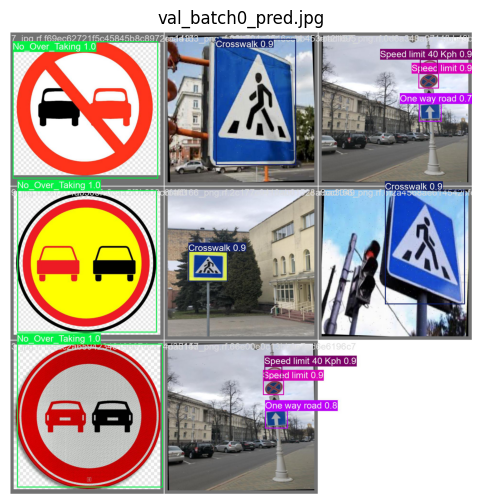

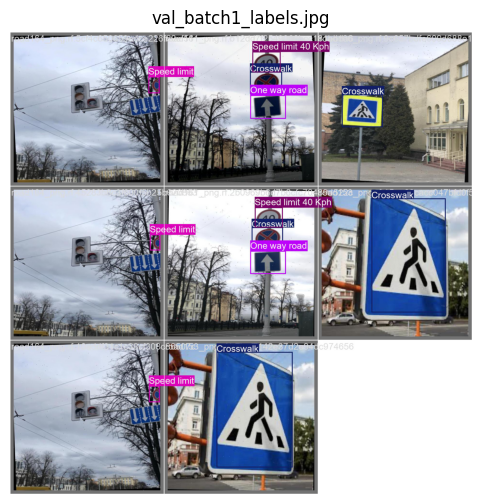

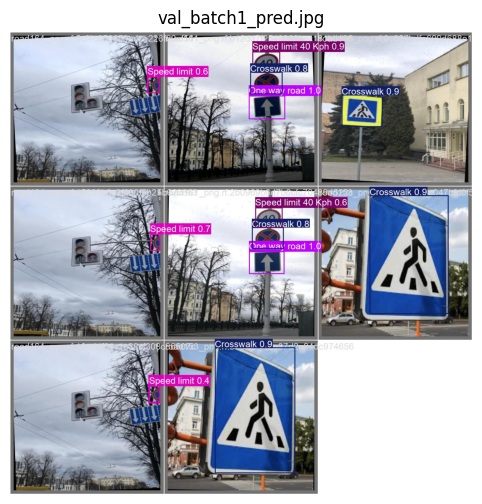

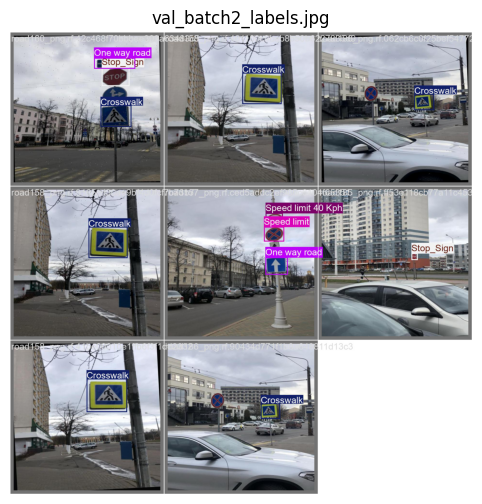

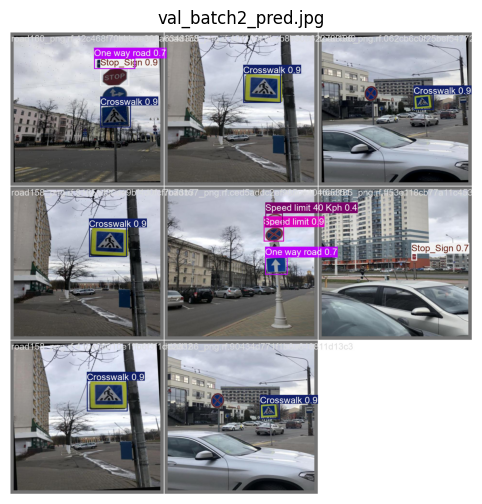

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

graph_folder = r'/app/Lab/Q3/pretrained_other/FINAL/yolov10/graphs'

# Listing all files
image_files = [f for f in os.listdir(graph_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Looping through each image file and display it
for image_file in image_files:
    img_path = os.path.join(graph_folder, image_file)
    img = Image.open(img_path)
    
    # Displaying the image with matplotlib
    plt.figure(figsize=(8, 6))  
    plt.imshow(img)
    plt.axis('off') 
    plt.title(image_file) 
    plt.show()
